In [14]:
wind_data = open("../inputs/day-17").read().rstrip()

In [15]:
grid = set([x for x in range(7)])

Defining the shapes such that (0,0) is the bottom left corner, which can be pushed right 2 steps and up as much steps as needed according to where the ground is:

In [16]:
shapes_template = [[0, 1, 2, 3],
                   [1,1j,1+1j,2+1j,1+2j],
                   [0,1,2,2+1j,2+2j],
                   [0,1j,2j,3j],
                   [0,1,1j,1+1j]]

In [17]:
class Iter:
    def __init__(self, data):
        self.data = data
        self.iter = iter(data)
    
    def __iter__(self):
        return self
    
    def __next__(self):
        try:
            return next(self.iter)
        except StopIteration:
            self.iter = iter(self.data)
            return next(self.iter)

In [18]:
winds = Iter(wind_data)
shapes = Iter(shapes_template)

In [19]:
def can_move(shape, movement, grid):
    new_shape = [coord + movement for coord in shape]
    if ((not (set(new_shape) & grid)) and max(new_shape ,key=lambda x: x.real).real < 7  \
        and min(new_shape ,key=lambda x: x.real).real >=  0):
        return new_shape
    else:
        return shape

In [20]:
height = 0

In [21]:
def step():
    floor = max(grid ,key=lambda x: x.imag).imag
    insertion = complex(2, floor + 4)
    shape = next(shapes)
    shape = [coord + insertion for coord in shape]
    while True:
        wind = next(winds)
        shift = 1 if wind == '>' else -1
        shape = can_move(shape, shift, grid)
        if (new_shape := can_move(shape, -1j, grid)) == shape:
            break
        else:
            shape = new_shape
    grid.update(shape)

In [22]:
def clear_row(thres = 50):
    global height, grid
    thres = int(max(grid, key=lambda x: x.imag).imag) - thres
    height += thres
    grid = {complex(g.real, g.imag - thres) for g in grid if g.imag > thres}

In [23]:
for i in range(2022):
    step()
    # if i > 0 and i % 1000 == 0:
    #     clear_row()

In [1015]:
for i in range(len(wind_data) * 29 * 2):
    if i % 100000 == 0:
        print(i)
    step()
    if i > 0 and i % 100 == 0:
        clear_row()

0
100000
200000
300000
400000
500000


In [ ]:
for i in range(1000000000000):
    if i % 100000 == 0:
        print(i)
    step()
    if i > 0 and i % 100 == 0:
        clear_row()

In [11]:
height

0

In [24]:
max(grid, key=lambda x: x.imag).imag + height

3173.0

In [13]:
max(grid, key=lambda x: x.imag).imag + height

4764.0

In [866]:
import math

In [950]:
math.lcm(len(wind_data))

10091

In [847]:
79263 * 2

158526

In [833]:
height

158406

In [785]:
len(wind_data)

10091

In [786]:
len(grid)

323

In [622]:
for i in range(3000):
    if {complex(n, i) for n in range(7)}.issubset(grid):
        print(i)

0
232
274
352
688
705
917
1174
1566
1625
1666
1959
2111
2247
2304
2306
2436
2506
2542
2623
2706
2742
2934
2976


In [540]:
{1,4,5} & {10,2,4,1,8,5}

{1, 4, 5}

In [533]:
for i in range(2022):
    if i % 1000 == 0:
        print(i)
    step()

0
1000
2000


In [449]:
from matplotlib import pyplot as plt
import numpy as np

In [599]:
matrix = [x.real for x in grid], [x.imag for x in grid]

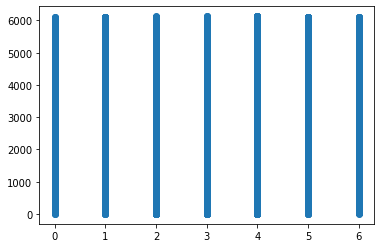

In [600]:
plt.scatter(*matrix)

In [151]:
a = 10

In [179]:
shape = next(shapes)
shape

[0, 1, 2, (2+1j), (2+2j)]

In [168]:
shape = [c + complex(2,10) for c in shape]

In [169]:
shape

[(2+10j), (2+11j), (2+12j), (2+13j)]

In [170]:
shapes

In [186]:
if not {2,3} & {10}:
    print(1)

1
